In [121]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from sklearn.utils import shuffle

In [2]:
train_data_info = pd.read_csv('/workspaces/AITemplate/BrainTechAcademy/Tutorial_Eye_Open_Close/data_train/data_train_tutorial_eye_open_closed.csv')
test_data_info = pd.read_csv('/workspaces/AITemplate/BrainTechAcademy/Tutorial_Eye_Open_Close/data_test/data_test_tutorial_eye_open_closed.csv')

In [3]:
train_data_info.head()

,x,y
0,test_plug_data_segmentation_151.csv,0
1,test_plug_data_segmentation_152.csv,0
2,test_plug_data_segmentation_153.csv,0
3,test_plug_data_segmentation_154.csv,0
4,test_plug_data_segmentation_155.csv,0


In [5]:
test_data_info.head()

,x,y
0,test_plug_data_segmentation_169.csv,0
1,test_plug_data_segmentation_170.csv,0
2,test_plug_data_segmentation_171.csv,0
3,test_plug_data_segmentation_172.csv,0
4,test_plug_data_segmentation_173.csv,0


In [10]:
# Drop the data in test_data_info from train_data_info
for i in (test_data_info['x']):
    train_data_info = train_data_info[train_data_info['x'] != i]

train_data_info.reset_index(drop=True, inplace=True)

In [16]:
train_data_info.shape

(36, 2)

In [17]:
test_data_info.shape

(12, 2)

In [147]:
#Make an empty pandas dataframe
X_train = pd.DataFrame(columns = ['A', 'B', 'C'])
y_train = pd.DataFrame(columns = ['Eye_Status'])

for i in range(len(train_data_info)):
    name = train_data_info['x'][i]
    train_data = pd.read_csv('/workspaces/AITemplate/BrainTechAcademy/Tutorial_Eye_Open_Close/data_train/{}'.format(name),
                            names = ['A', 'B', 'C'])
    X_train = pd.concat([X_train, train_data], axis=0, ignore_index=True)

    target = {'Eye_Status': train_data_info['y'][i]}
    
    for t in range(len(train_data)):
        y_train = pd.concat([y_train, pd.DataFrame(target, index=[0])], ignore_index=True)

/tmp/ipykernel_2022/1653334370.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  X_train = pd.concat([X_train, train_data], axis=0, ignore_index=True)


In [148]:
#Make an empty pandas dataframe
X_test = pd.DataFrame(columns = ['A', 'B', 'C'])
y_test = pd.DataFrame(columns = ['Eye_Status'])

for i in range(len(test_data_info)):
    name = test_data_info['x'][i]
    test_data = pd.read_csv('/workspaces/AITemplate/BrainTechAcademy/Tutorial_Eye_Open_Close/data_test/{}'.format(name),
                            names = ['A', 'B', 'C'])
    X_test = pd.concat([X_test, test_data], axis=0, ignore_index=True)

    target = {'Eye_Status': test_data_info['y'][i]}
    
    for t in range(len(test_data)):
        y_test = pd.concat([y_test, pd.DataFrame(target, index=[0])], ignore_index=True)

/tmp/ipykernel_2022/3998398698.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  X_test = pd.concat([X_test, test_data], axis=0, ignore_index=True)


In [68]:
X_train.shape

(21600, 3)

In [69]:
y_train.shape

(21600, 1)

In [70]:
X_test.shape

(7200, 3)

In [71]:
y_test.shape

(7200, 1)

In [101]:
X_train.describe()

,A,B,C
count,21600.000000,21600.000000,21600.000000
mean,-0.008764,0.006380,0.009347
std,7.961090,7.077056,8.156143
min,-114.100527,-81.164262,-79.773434
25%,-4.387355,-4.262076,-4.590445
50%,-0.019827,0.035578,0.050082
75%,4.277587,4.279244,4.604046
max,102.808990,86.733703,82.162260


In [149]:
y_train = y_train.drop(X_train[X_train["A"] >= 40].index)
X_train = X_train.drop(X_train[X_train["A"] >= 40].index)
y_train = y_train.drop(X_train[X_train["B"] >= 40].index)
X_train = X_train.drop(X_train[X_train["B"] >= 40].index)
y_train = y_train.drop(X_train[X_train["C"] >= 40].index)
X_train = X_train.drop(X_train[X_train["C"] >= 40].index)

y_train = y_train.drop(X_train[X_train["A"] <= -40].index)
X_train = X_train.drop(X_train[X_train["A"] <= -40].index)
y_train = y_train.drop(X_train[X_train["B"] <= -40].index)
X_train = X_train.drop(X_train[X_train["B"] <= -40].index)
y_train = y_train.drop(X_train[X_train["C"] <= -40].index)
X_train = X_train.drop(X_train[X_train["C"] <= -40].index)

X_train.describe()

,A,B,C
count,21536.000000,21536.000000,21536.000000
mean,-0.025523,0.019252,0.058618
std,7.550564,6.860185,7.843613
min,-39.856821,-36.275836,-39.701546
25%,-4.373282,-4.247144,-4.561322
50%,-0.024577,0.042325,0.064611
75%,4.259952,4.274556,4.604046
max,39.582962,35.462903,38.144326


In [150]:
y_test = y_test.drop(X_test[X_test["A"] >= 40].index)
X_test = X_test.drop(X_test[X_test["A"] >= 40].index)
y_test = y_test.drop(X_test[X_test["B"] >= 40].index)
X_test = X_test.drop(X_test[X_test["B"] >= 40].index)
y_test = y_test.drop(X_test[X_test["C"] >= 40].index)
X_test = X_test.drop(X_test[X_test["C"] >= 40].index)

y_test = y_test.drop(X_test[X_test["A"] <= -40].index)
X_test = X_test.drop(X_test[X_test["A"] <= -40].index)
y_test = y_test.drop(X_test[X_test["B"] <= -40].index)
X_test = X_test.drop(X_test[X_test["B"] <= -40].index)
y_test = y_test.drop(X_test[X_test["C"] <= -40].index)
X_test = X_test.drop(X_test[X_test["C"] <= -40].index)

X_test.describe()

,A,B,C
count,7200.000000,7200.000000,7200.000000
mean,0.035703,-0.045687,-0.053433
std,7.487673,7.332335,8.494258
min,-28.590311,-26.063178,-36.954110
25%,-4.429252,-4.594936,-5.070522
50%,-0.218448,-0.177339,-0.197163
75%,4.124103,4.254517,4.753597
max,39.424596,35.454412,37.294761


In [151]:
#Count number of A that is over 30
X_train[X_train["A"] <= -30].count()

A    32
B    32
C    32
dtype: int64

In [152]:
X_train.shape

(21536, 3)

In [153]:
y_train.shape

(21536, 1)

In [154]:
X_test.shape

(7200, 3)

In [155]:
y_test.shape

(7200, 1)

In [156]:
X_train['A'] = 30/(1 + np.exp(-X_train['A']))
X_train['B'] = 30/(1 + np.exp(-X_train['B']))
X_train['C'] = 30/(1 + np.exp(-X_train['C']))

X_test['A'] = 30/(1 + np.exp(-X_test['A']))
X_test['B'] = 30/(1 + np.exp(-X_test['B']))
X_test['C'] = 30/(1 + np.exp(-X_test['C']))

X_train.describe()

,A,B,C
count,2.153600e+04,2.153600e+04,2.153600e+04
mean,1.493675e+01,1.505034e+01,1.507441e+01
std,1.302708e+01,1.302968e+01,1.319469e+01
min,1.470699e-16,5.281120e-15,1.717746e-16
25%,3.735830e-01,4.230984e-01,3.102059e-01
50%,1.481568e+01,1.531739e+01,1.548441e+01
75%,2.958221e+01,2.958818e+01,2.970264e+01
max,3.000000e+01,3.000000e+01,3.000000e+01


In [157]:
print(X_train["B"])

0        10.058161
1        16.236589
2         8.603797
3        16.783886
4        29.161798
           ...    
21595     0.431567
21596     0.020721
21597     0.002818
21598     0.001720
21599     0.002918
Name: B, Length: 21536, dtype: float64


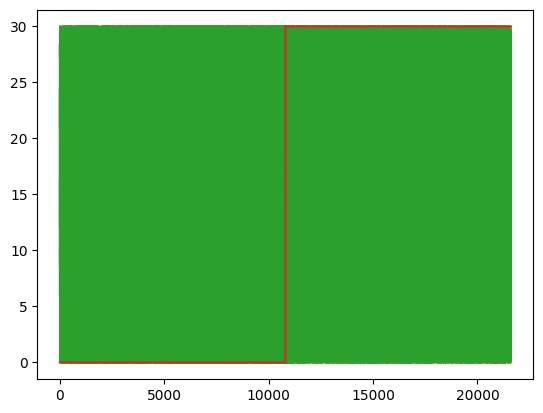

In [158]:
#Graph the data
plt.plot(X_train["A"])
plt.plot(X_train["B"])
plt.plot(X_train["C"])
plt.plot(y_train["Eye_Status"]*30)
plt.show()

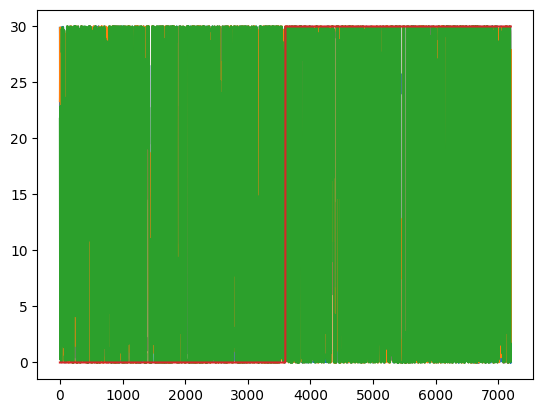

In [159]:
plt.plot(X_test["A"])
plt.plot(X_test["B"])
plt.plot(X_test["C"])
plt.plot(y_test["Eye_Status"]*30)
plt.show()

In [160]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [161]:
#Shuffle the data
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

#Reset the index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [162]:
y_train.head()

,Eye_Status
0,0
1,0
2,1
3,0
4,1


In [163]:
print(y_test["Eye_Status"][1])

0


Epoch 1/10


539/539 [==============================] - 1s 1ms/step - loss: 0.6957 - accuracy: 0.5324 - val_loss: 0.6878 - val_accuracy: 0.5481
Epoch 2/10
539/539 [==============================] - 1s 1ms/step - loss: 0.6881 - accuracy: 0.5440 - val_loss: 0.6971 - val_accuracy: 0.5288
Epoch 3/10
539/539 [==============================] - 1s 1ms/step - loss: 0.6868 - accuracy: 0.5481 - val_loss: 0.6834 - val_accuracy: 0.5601
Epoch 4/10
539/539 [==============================] - 1s 1ms/step - loss: 0.6856 - accuracy: 0.5512 - val_loss: 0.6880 - val_accuracy: 0.5221
Epoch 5/10
539/539 [==============================] - 1s 1ms/step - loss: 0.6856 - accuracy: 0.5477 - val_loss: 0.6849 - val_accuracy: 0.5299
Epoch 6/10
539/539 [==============================] - 1s 1ms/step - loss: 0.6841 - accuracy: 0.5534 - val_loss: 0.6818 - val_accuracy: 0.5562
Epoch 7/10
539/539 [==============================] - 1s 1ms/step - loss: 0.6841 - accuracy: 0.5567 - val_loss: 0.6818 - val_accuracy: 0.5564
Epoch 8/10
539/53

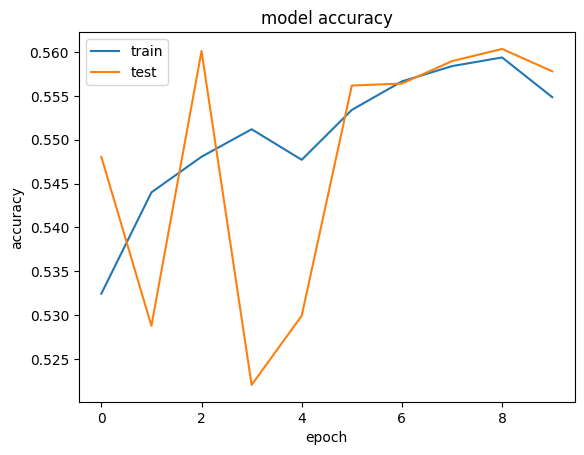

In [166]:
model = Sequential()
model.add(Dense(128, input_dim=3, activation='relu', use_bias = True))
model.add(Dense(64, activation='relu', use_bias = True))
model.add(Dense(32, activation='relu', use_bias = True))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

model.summary()
print(model.evaluate(X_test, y_test))
for i in range(10):
    print(model.predict(X_test)[i])
    print(y_test["Eye_Status"][i])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()